In [1]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# File is stored in github repository for easiness of access
INPUT_FILE_PATH = "water_potability.csv"

# Read the csv file from the url
df = pd.read_csv(INPUT_FILE_PATH)

# Print the first 5 rows of the dataframe
display(df.head())

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [4]:
df.describe

<bound method NDFrame.describe of             ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.9631

In [5]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

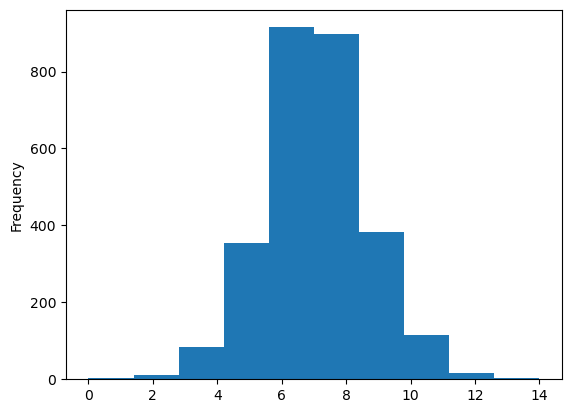

Mean: 7.080794504276835
Median: 7.036752103833548


In [6]:
df['ph'].plot.hist()
plt.show()

mean_value = df['ph'].mean()
median_value = df['ph'].median()

print("Mean:", mean_value)
print("Median:", median_value)

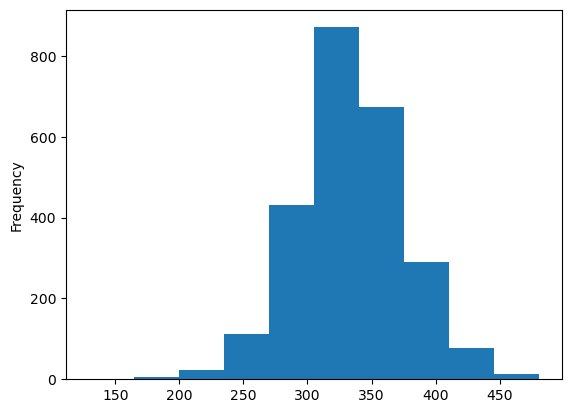

Mean: 333.7757766108135
Median: 333.073545745888


In [7]:
df['Sulfate'].plot.hist()
plt.show()

mean_value = df['Sulfate'].mean()
median_value = df['Sulfate'].median()

print("Mean:", mean_value)
print("Median:", median_value)

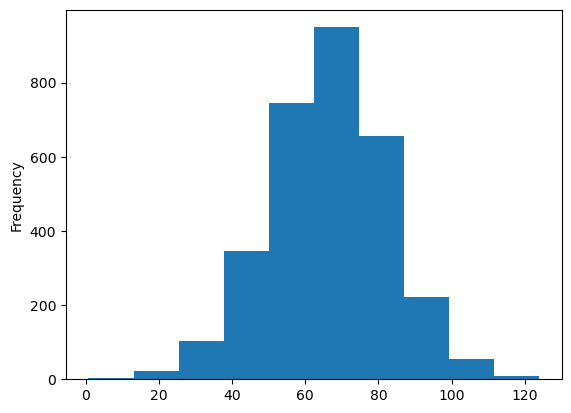

Mean: 66.39629294676803
Median: 66.62248509808484


In [8]:
df['Trihalomethanes'].plot.hist()
plt.show()

mean_value = df['Trihalomethanes'].mean()
median_value = df['Trihalomethanes'].median()

print("Mean:", mean_value)
print("Median:", median_value)

In [9]:
df = df.fillna(df.mean())
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [10]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5
outliers = df[(df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR))]

print(outliers)

           ph  Hardness        Solids  Chloramines  Sulfate  Conductivity  \
0         NaN       NaN           NaN          NaN      NaN           NaN   
1     3.71608       NaN           NaN          NaN      NaN           NaN   
2         NaN       NaN           NaN          NaN      NaN           NaN   
3         NaN       NaN           NaN          NaN      NaN           NaN   
4         NaN       NaN           NaN          NaN      NaN           NaN   
...       ...       ...           ...          ...      ...           ...   
3271      NaN       NaN  47580.991603          NaN      NaN           NaN   
3272      NaN       NaN           NaN          NaN      NaN           NaN   
3273      NaN       NaN           NaN          NaN      NaN           NaN   
3274      NaN       NaN           NaN          NaN      NaN           NaN   
3275      NaN       NaN           NaN          NaN      NaN           NaN   

      Organic_carbon  Trihalomethanes  Turbidity  Potability  
0           

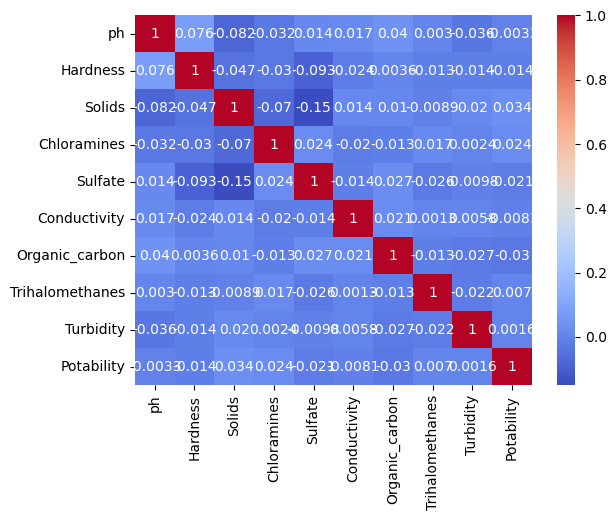

In [11]:
correlation_matrix = df.corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

In [12]:
skewness = df.skew()

for column, skew in skewness.items():
    print(f"Column '{column}': Skewness = {skew}")
skewed_columns = sum(skewness != 0)
print(f"Number of skewed columns: {skewed_columns}")

Column 'ph': Skewness = 0.027795881574044657
Column 'Hardness': Skewness = -0.0393417047767249
Column 'Solids': Skewness = 0.6216344855169127
Column 'Chloramines': Skewness = -0.01209844012438221
Column 'Sulfate': Skewness = -0.04118437258768767
Column 'Conductivity': Skewness = 0.2644902239264119
Column 'Organic_carbon': Skewness = 0.025532582090242492
Column 'Trihalomethanes': Skewness = -0.08516101983758483
Column 'Turbidity': Skewness = -0.007816642377392604
Column 'Potability': Skewness = 0.4507837491078628
Number of skewed columns: 10


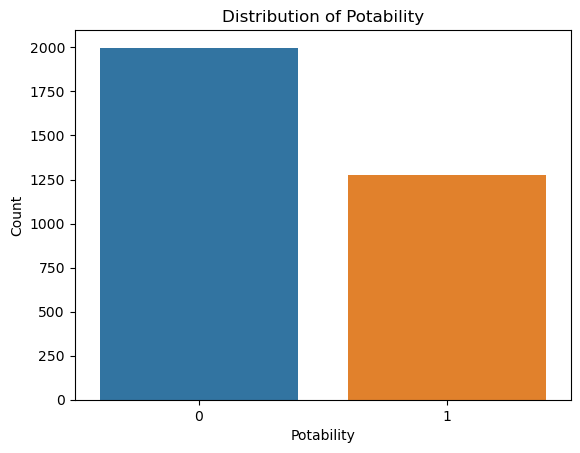

In [13]:
sns.countplot(x='Potability', data=df)

# Add labels and title
plt.xlabel('Potability')
plt.ylabel('Count')
plt.title('Distribution of Potability')

# Show the plot
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(df)
normalized_features

array([[0.50577104, 0.57113901, 0.33609646, ..., 0.69975313, 0.28609102,
        0.        ],
       [0.26543429, 0.29740043, 0.30061142, ..., 0.4509993 , 0.57679264,
        0.        ],
       [0.57850887, 0.64131081, 0.32161885, ..., 0.5328657 , 0.30363656,
        0.        ],
       ...,
       [0.67282217, 0.46548556, 0.53910122, ..., 0.56065454, 0.34956996,
        1.        ],
       [0.36619735, 0.66440723, 0.19148981, ..., 0.62265916, 0.61611996,
        1.        ],
       [0.56247653, 0.53563505, 0.28048408, ..., 0.63247754, 0.16244074,
        1.        ]])

In [2]:
df.to_csv('cleaned.csv', index=False)

NameError: name 'df' is not defined

In [53]:
correlation = df['ph'].corr(df['Solids'])

# Print the correlation coefficient
print(f"Correlation coefficient: {correlation}")

Correlation coefficient: -0.08188370882567786
